<a href="https://colab.research.google.com/github/Vikramhingane001/Vikramhingane001/blob/main/Tomato_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/ .kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d kaustubhb999/tomatoleaf


 96% 172M/179M [00:03<00:00, 55.7MB/s]
100% 179M/179M [00:03<00:00, 59.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/tomatoleaf.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D ,MaxPooling2D,Dense,Flatten
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/tomato/train',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (255,255),
    batch_size= 32,
  )

# generators



Found 10000 files belonging to 10 classes.


In [ ]:
val_ds = keras.utils.image_dataset_from_directory(
     directory = '/content/tomato/val',
    image_size = (255,255),
    batch_size= 32,
    labels = 'inferred',
    label_mode = 'int',

)

Found 1000 files belonging to 10 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
len(train_ds)

313

In [ ]:
len(val_ds)

32

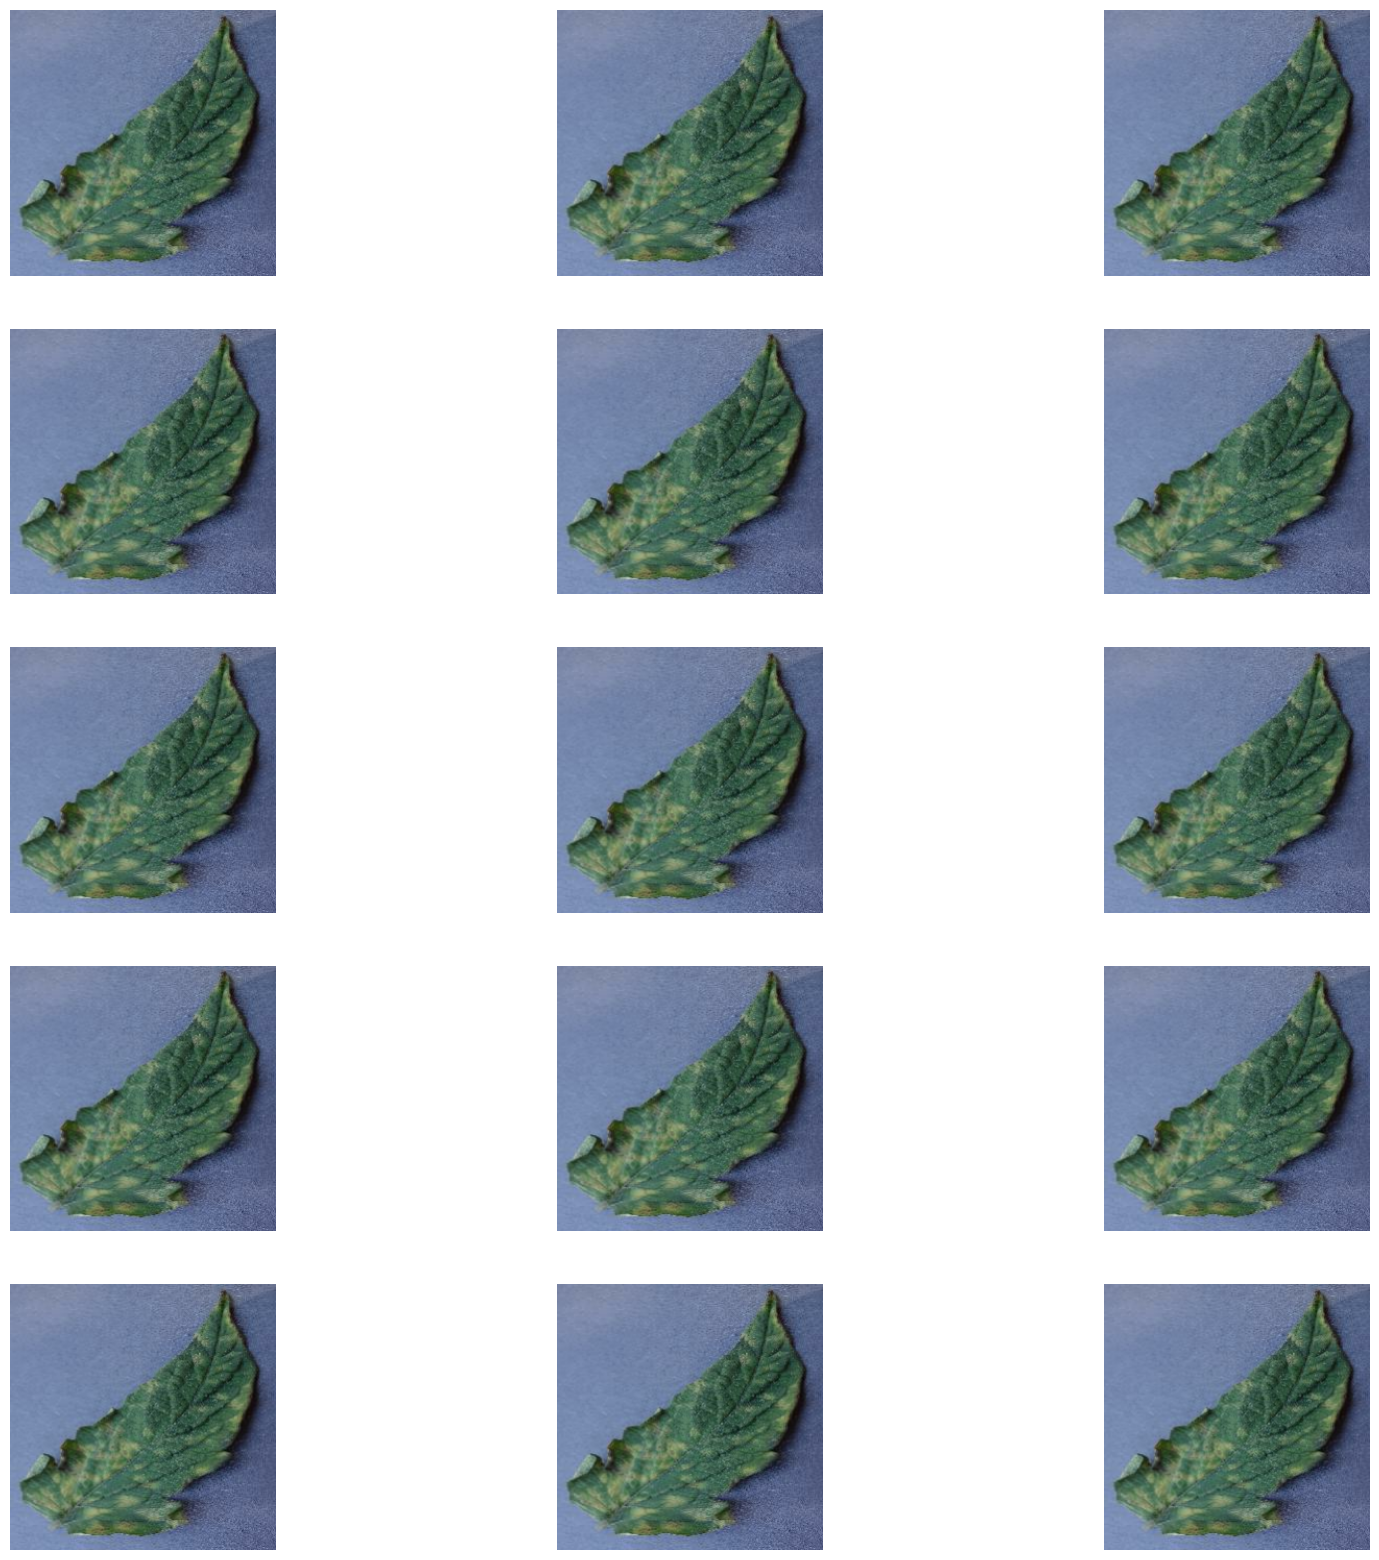

In [ ]:
from numpy import uint8
plt.figure(figsize=(20,20))
for image_batch,label_batch in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(5,3,i+1)
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.axis('off')

In [ ]:
def process_df(image,label):
  image = tf.cast(image/255,tf.float32)
  label = tf.clip_by_value(label, 0, n_classes - 1)

  return image,label



In [ ]:
from multiprocessing import process
train_ds= train_ds.map(process_df)
val_ds = val_ds.map(process_df)

In [ ]:
len(train_ds)

313

In [ ]:
from keras.layers.attention.multi_head_attention import activation
input_shape = (255,255,3)
batch_size = 32
n_classes = 9
cnn_model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')

])
cnn_model.build(input_shape = input_shape)


In [ ]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 246016)            0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [ ]:

cnn_model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']

)

In [ ]:
hist = cnn_model.fit(
    train_ds,
    epochs = 5,
    validation_data = val_ds

)

Epoch 1/5
313/313 [==============================] - 775s 2s/step - loss: 1.3752 - accuracy: 0.5676 - val_loss: 0.7944 - val_accuracy: 0.7360
Epoch 2/5
313/313 [==============================] - 734s 2s/step - loss: 0.5478 - accuracy: 0.8113 - val_loss: 0.6824 - val_accuracy: 0.7890
Epoch 3/5
313/313 [==============================] - 763s 2s/step - loss: 0.3103 - accuracy: 0.8981 - val_loss: 0.5991 - val_accuracy: 0.8160
Epoch 4/5
313/313 [==============================] - 759s 2s/step - loss: 0.1885 - accuracy: 0.9385 - val_loss: 0.6543 - val_accuracy: 0.8230
Epoch 5/5
313/313 [==============================] - 751s 2s/step - loss: 0.1022 - accuracy: 0.9672 - val_loss: 0.7596 - val_accuracy: 0.8330


In [ ]:
hist.params

{'verbose': 1, 'epochs': 5, 'steps': 313}

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
hist.history['loss']

[1.3752315044403076,
 0.5478485822677612,
 0.31029003858566284,
 0.18853759765625,
 0.10219649225473404]

In [ ]:
hist.history['accuracy']

[0.5676000118255615,
 0.8112999796867371,
 0.8981000185012817,
 0.9384999871253967,
 0.967199981212616]

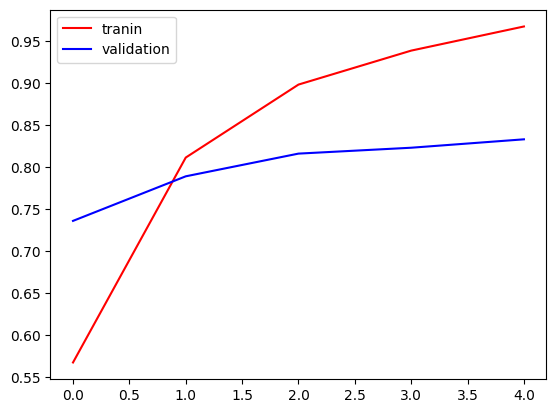

In [ ]:
plt.plot(hist.history['accuracy'],color = 'red',label = 'tranin')
plt.plot(hist.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()


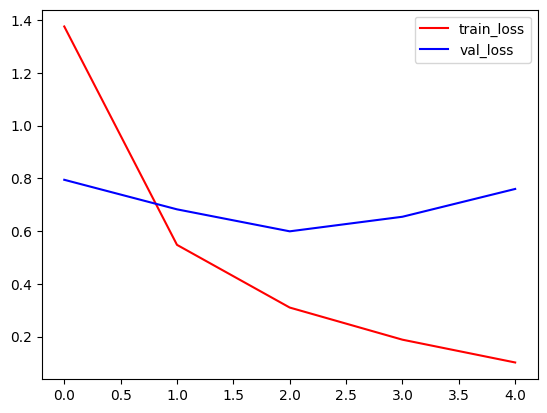

In [ ]:
plt.plot(hist.history['loss'], color = 'red', label = 'train_loss')
plt.plot(hist.history['val_loss'],color = 'blue', label = 'val_loss')
plt.legend()
plt.show()